# Sclera segmentation

In [10]:
# import libraries
import cv2
import numpy as np

from matplotlib import pyplot as plt
from scipy import ndimage

from sclera_segmentation import exposure 
from sclera_segmentation.threshold import threshold
from sclera_segmentation import norm_cuts as nc

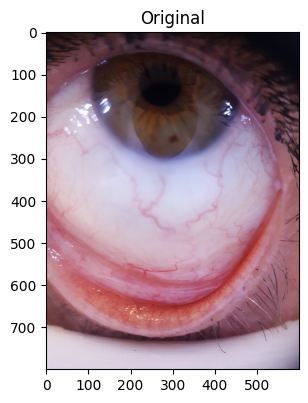

In [4]:
image_path=r'C:\Users\91879\Downloads\anemia-detection-main\database_sclere\Italiano congiuntive\Dataset congiuntive italiano segmentato\T_9_20190607_075803\T_9_20190607_075803.jpg'   # modify the image_path to your own dir

assert image_path != '', 'Please specify the image_path!'


image=cv2.imread(image_path)

# Resize the image
new_size = (600, 800)
image = cv2.resize(image, new_size)
# Convert the image from BGR to RGB format
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 15))

plt.subplot(141)
plt.title("Original")
plt.imshow(image)

plt.show()


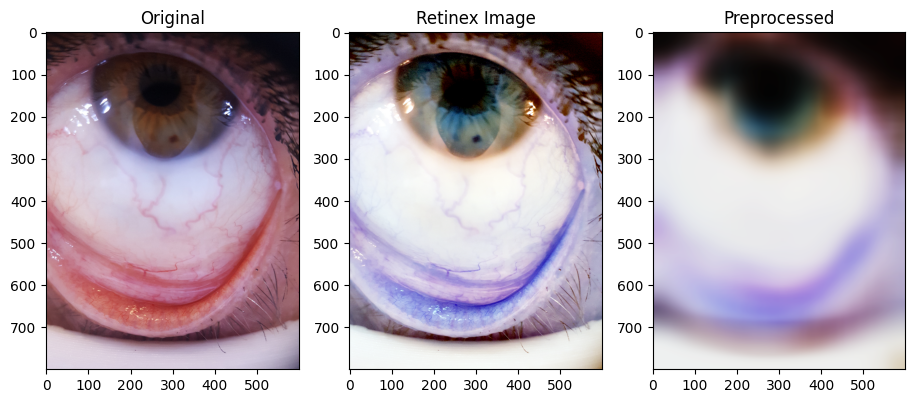

In [5]:
fix_range=0
cuts=10
compactness=10
blur_scale=1
n_cuts=10
n_thresh=0.1
imp_cuts=10
imp_thresh=0.1
imp_comp=6, 
imp_fix=30.0
gamma=1
 
retinex_img = exposure.automatedMSRCR(image)

preprocessed = exposure.preprocess(retinex_img)

plt.figure(figsize=(15, 15))

plt.subplot(141)
plt.title("Original")
plt.imshow(image)

# Convert the image from BGR to RGB format
retinex_img2 = cv2.cvtColor(retinex_img, cv2.COLOR_BGR2RGB)
plt.subplot(142)
plt.title("Retinex Image")
plt.imshow(retinex_img2)

# Convert the image from BGR to RGB format
preprocessed2 = cv2.cvtColor(preprocessed, cv2.COLOR_BGR2RGB)
plt.subplot(143)
plt.title("Preprocessed")
plt.imshow(preprocessed2)

plt.show()

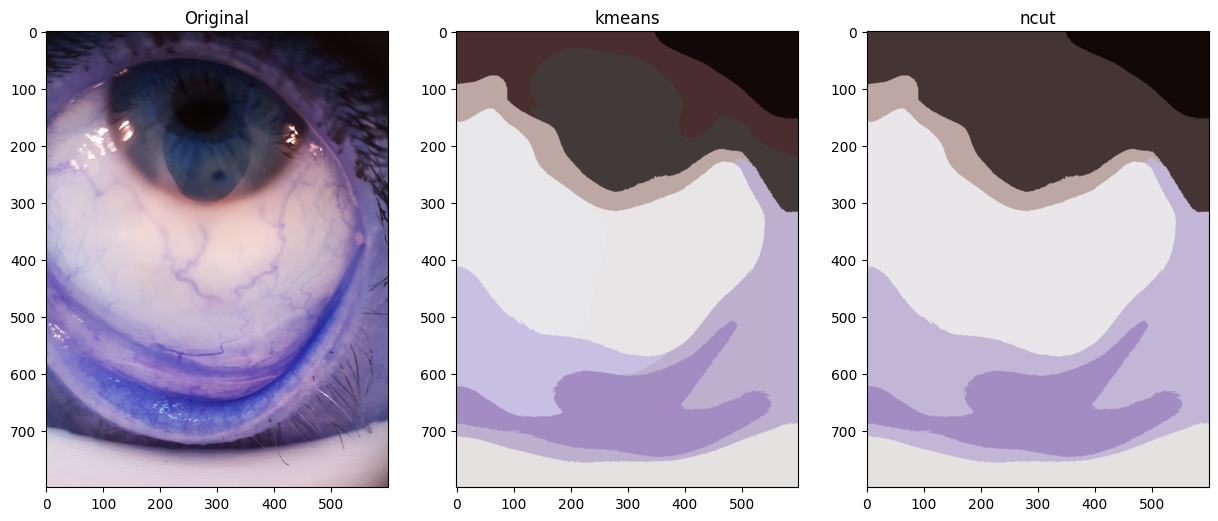

In [6]:

original, kmeans, ncut = nc.nCut(preprocessed, cuts=cuts, 
compactness=compactness, n_cuts=n_cuts, thresh=n_thresh)

plt.figure(figsize=(15, 15))

# Convert the image from BGR to RGB format
image2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.subplot(131)
plt.title("Original")
plt.imshow(image2)

# Convert the image from BGR to RGB format
kmeans2 = cv2.cvtColor(kmeans, cv2.COLOR_BGR2RGB)
plt.subplot(132)
plt.title("kmeans")
plt.imshow(kmeans2)

# Convert the image from BGR to RGB format
ncut2 = cv2.cvtColor(ncut, cv2.COLOR_BGR2RGB)
plt.subplot(133)
plt.title("ncut")
plt.imshow(ncut2)

plt.show()

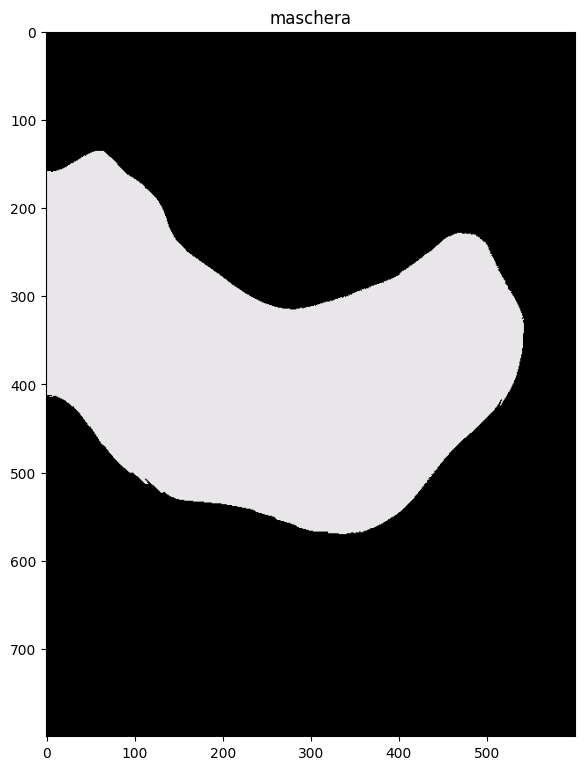

In [11]:
def calcola_area_e_filtra(image, soglia_y=380):

    image_backup = image.copy()

    #convert in gray scale
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    #convert in black values lower then 200
    image = np.where(image < 200, 0, image)
    
    # converti in white values greater then 199
    image = np.where(image >= 200, 255, image)

    # label joint regions
    labeled_image, num_labels = ndimage.label(image)
    
    # Apply the y threshold filter to discard pixels below the threshold
    filtered_image = np.copy(image)

    filtered_image[filtered_image > soglia_y] = 0

    # Recalculates the size of connected regions after applying the threshold filter
    filtered_sizes = ndimage.sum(filtered_image, labeled_image, range(1, num_labels + 1))
    
    plt.figure(figsize=(15, 15))

    # Convert the image from BGR to RGB format
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Convert the image from BGR to RGB format
    filtered_image = cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB)


    if len(filtered_sizes) > 0:
        largest_area_index = np.argmax(filtered_sizes)
        
        # Create a mask to keep only the largest area
        largest_area_mask = np.zeros_like(image)
        largest_area_mask = largest_area_mask[:,:,0]
        largest_area_mask[labeled_image == largest_area_index + 1] = 255

        image_output = cv2.bitwise_and(image_backup, image_backup, mask=largest_area_mask)

        return image_output
    else:
        return filtered_image


img_threshold = threshold(retinex_img)

test = calcola_area_e_filtra(ncut)

# Convert the image from BGR to RGB format
test = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)
plt.subplot(122)
plt.title("maschera")
plt.imshow(test)

plt.show()